In [ ]:
train_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/training_data'
test_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/training_data'


In [ ]:
import os
os.listdir(train_data_path)

['pnemonia', 'normal', 'covid']

In [ ]:
import os
os.listdir(test_data_path)

['pnemonia', 'normal', 'covid']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn

In [ ]:
# # reading one cat image

# plt.figure(figsize=(5,3))
# cat_image = cv2.imread(train_data_path+'/cats/cat.1.jpg')
# plt.imshow(cat_image[:,:,::-1])

In [ ]:
# # reading one dog image

# plt.figure(figsize=(5,3))
# dog_image = cv2.imread(train_data_path+'/dogs/dog.1.jpg')
# plt.imshow(dog_image[:,:,::-1])

In [ ]:
# for better training purpose
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_tech = ImageDataGenerator(rescale=1/255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)


testing_data_tech = ImageDataGenerator(rescale=1/255)

In [ ]:
target_labels = os.listdir(train_data_path)

In [ ]:
train_final_data = training_data_tech.flow_from_directory(train_data_path,
                                                          target_size=(256, 256),
                                                          classes = target_labels,
                                                          class_mode='categorical',
                                                          batch_size=5)


Found 240 images belonging to 3 classes.


In [ ]:
test_final_data = testing_data_tech.flow_from_directory(test_data_path,
                                                        classes = target_labels,
                                                        target_size=(256,256))

Found 240 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.activations import relu,softmax
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# create the Architecture

# custom structure


model = Sequential()

# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (int(256),int(256),3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten()) # one dimensional array


# above 1d data give to ANN
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2


# output layer
model.add(Dense(len(os.listdir(train_data_path)),activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 6)           │           1,734 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          49,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,337 (575.54 KB)

 Trainable params: 147,337 (575.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
model.fit(train_final_data,
          epochs=10
          )

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - Accuracy: 0.8052 - loss: 0.3942
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - Accuracy: 0.8193 - loss: 0.4179
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - Accuracy: 0.8341 - loss: 0.4838
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - Accuracy: 0.8975 - loss: 0.2997
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - Accuracy: 0.8596 - loss: 0.3335
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - Accuracy: 0.9082 - loss: 0.2918
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - Accuracy: 0.9087 - loss: 0.2347
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - Accuracy: 0.9334 - loss: 0.2006
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - Accuracy: 0.8607 - loss: 0.2959
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - Accuracy: 0.8789 - loss: 0.2581


In [ ]:
# Training Accuracy = 99 %

In [ ]:
model.predict(test_final_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 699ms/step


array([[2.61808597e-09, 1.17403133e-07, 9.99999881e-01],
       [5.03614312e-04, 2.56146974e-04, 9.99240279e-01],
       [4.83858594e-06, 2.43099853e-01, 7.56895304e-01],
       [8.06742966e-01, 6.68436242e-03, 1.86572611e-01],
       [6.20667208e-07, 1.25527113e-05, 9.99986768e-01],
       [1.38500836e-02, 9.82136309e-01, 4.01365990e-03],
       [2.09879261e-04, 5.93483984e-01, 4.06306118e-01],
       [9.84147906e-01, 7.92731997e-03, 7.92485941e-03],
       [6.79327968e-07, 1.26533705e-05, 9.99986649e-01],
       [4.42428976e-01, 1.81875937e-02, 5.39383471e-01],
       [1.40458360e-04, 1.04972452e-03, 9.98809814e-01],
       [3.11561656e-04, 6.55008573e-03, 9.93138373e-01],
       [7.79851803e-07, 1.87688071e-04, 9.99811590e-01],
       [3.00053388e-01, 6.94911599e-01, 5.03498828e-03],
       [3.19474353e-03, 6.14471594e-03, 9.90660489e-01],
       [1.21738471e-04, 1.94604698e-04, 9.99683619e-01],
       [1.89547762e-04, 5.39280772e-01, 4.60529745e-01],
       [9.74972546e-01, 2.08722

In [ ]:
a = [2.46882322e-04, 3.34301242e-03, 9.96410072e-01]
np.argmax(a)
# ['pnemonia', 'normal', 'covid']

2

In [ ]:
# check the New data point

def checking(path):
  test_image = cv2.imread(path,1) # reading the image

  re_test_img = cv2.resize(test_image,(256,256)) # resizing the image

  sc_test_img = re_test_img / 255 # scale down the pixels

  final_input_image = np.expand_dims(sc_test_img,axis=0) # adding an extra dimension

  if np.argmax(model.predict(final_input_image)) == 0 :
    print('pnemonia')
  elif np.argmax(model.predict(final_input_image)) == 1:
    print('normal')
  else :
    print("covid")

  plt.imshow(test_image[:,:,::-1])




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
normal


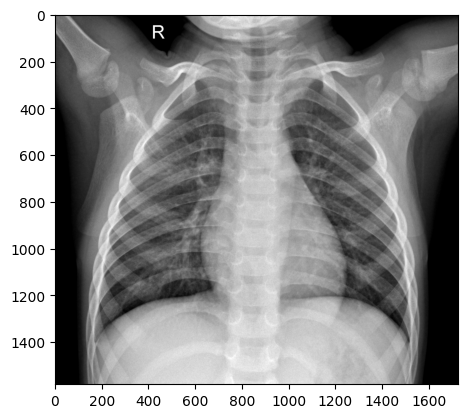

In [ ]:
checking('/content/NORMAL(79).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
pnemonia


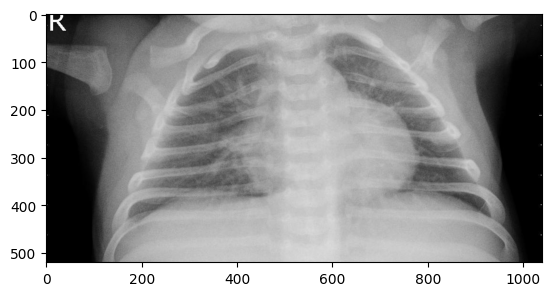

In [ ]:
checking('/content/PNEUMONIA(82).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
covid


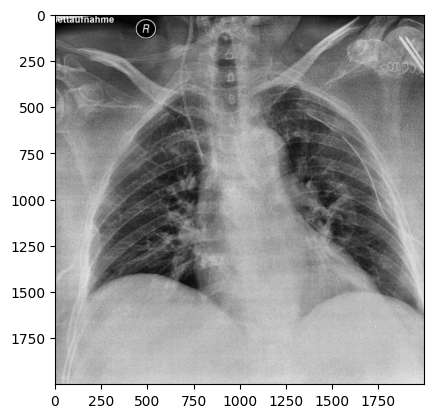

In [ ]:
checking('/content/COVID19(83).jpg')